In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
from collections import Counter

In [16]:
data = pd.read_csv('arxiv_papers.csv')

In [17]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-03
1,Hunting for the candidates of Changing-Look Bl...,The changing-look blazars (CLBs) are the blaza...,"['Shi-Ju Kang', 'Shan-Shan Ren', 'Yong-Gang Zh...",7.0,13.0,3.0,arxiv.org/pdf/2501.00094,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Active galactic nuclei (16) – Blazars (164) ...,2025-01-03
2,First unambiguous detection of ammonia in the ...,The newly accessible mid-infrared (MIR) window...,"['Mathilde Mâlin', 'Anthony Boccaletti', 'Clém...",6.0,18.0,4.0,arxiv.org/pdf/2501.00104,Earth and Planetary Astrophysics,NaN,A&A,NaN,"['Planetary systems', 'Stars: individual: GJ 5...",2025-01-03
3,Exchange of meteorites between the terrestrial...,The evolution of the orbits of bodies ejected ...,['S.I. Ipatov'],0.0,6.0,0.0,arxiv.org/pdf/2501.00134,Earth and Planetary Astrophysics,NaN,NaN,Modern astronomy: from the Early Universe to e...,['planets and satellites: terrestrial planets'],2025-01-03
4,Autoencoder Reconstruction of Cosmological Mic...,Enhanced modeling of microlensing variations i...,"['Somayeh Khakpash', 'Federica Bianco', 'Georg...",11.0,18.0,1.0,arxiv.org/pdf/2501.00153,Instrumentation and Methods for Astrophysics,NaN,The Astrophysical Journal,NaN,['- Interdisciplinary astronomy(804) 1'],2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,On the spatial distribution of luminous blue v...,"In the current paper, we present a study of th...","['A. Kostenkov', 'S. Fabrika', 'A. Kaldybekova...",8.0,19.0,0.0,arxiv.org/pdf/2503.16349,Astrophysics of Galaxies,['Solar and Stellar Astrophysics'],NaN,NaN,['outflows — stars: vari- ables: S Doradus — s...,2025-03-21
3682,DEMNUni: the Sunyaev-Zel'dovich effect in the ...,"In recent years, the study of secondary anisot...","['Davide Luchina', 'Mauro Roncarelli', 'Matteo...",12.0,25.0,6.0,arxiv.org/pdf/2503.16355,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,"['CosmicMicrowaveBackground', 'Neutrino', 'Cos...",2025-03-21
3683,Euclid: Early Release Observations -- Interpla...,We present an analysis of globular clusters (G...,"['T. Saifollahi', 'A. Lançon', 'Michele Cantie...",17.0,23.0,1.0,arxiv.org/pdf/2503.16367,Astrophysics of Galaxies,NaN,A&A,NaN,['Galaxies: clusters: individual: Perseus – Ga...,2025-03-21
3684,The impact of baryons on the sparsity of simul...,Measurements of the sparsity of galaxy cluster...,"['P. S. Corasaniti', 'T. R. G. Richardson', 'S...",29.0,23.0,8.0,arxiv.org/pdf/2503.16379,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['(cosmology:) Large-scale Structures of Unive...,2025-03-21


In [18]:
authors = data['authors'].tolist()
# Flatten the list of authors and count occurrences
all_authors = [author for sublist in authors for author in sublist.split(', ')]
author_counts = Counter(all_authors)

# Find the most common author
most_common_author, count = author_counts.most_common(1)[0]
print(f"The most repeated author is {most_common_author} and they were repeated {count} times.")

# Find the second most common author
second_most_common_author, count = author_counts.most_common(2)[1]
print(f"The second most repeated author is {second_most_common_author} and they were repeated {count} times.")

The most repeated author is 'J. Carretero' and they were repeated 58 times.
The second most repeated author is 'F. Courbin' and they were repeated 46 times.


In [19]:
primary_subjects = data['primary_subject'].tolist()
# Flatten the list of primary subjects and count occurrences
all_primary_subjects = [subject for sublist in primary_subjects for subject in sublist.split(', ')]
primary_subject_counts = Counter(all_primary_subjects)

# Find the most common primary subject
most_common_primary_subject, count = primary_subject_counts.most_common(1)[0]
print(f"The most repeated primary subject is {most_common_primary_subject} and it was repeated {count} times.")

# Find the 2nd most common primary subject
most_common_primary_subject_2, count = primary_subject_counts.most_common(2)[1]
print(f"The second most repeated primary subject is {most_common_primary_subject_2} and it was repeated {count} times.")

The most repeated primary subject is Astrophysics of Galaxies and it was repeated 1027 times.
The second most repeated primary subject is High Energy Astrophysical Phenomena and it was repeated 776 times.


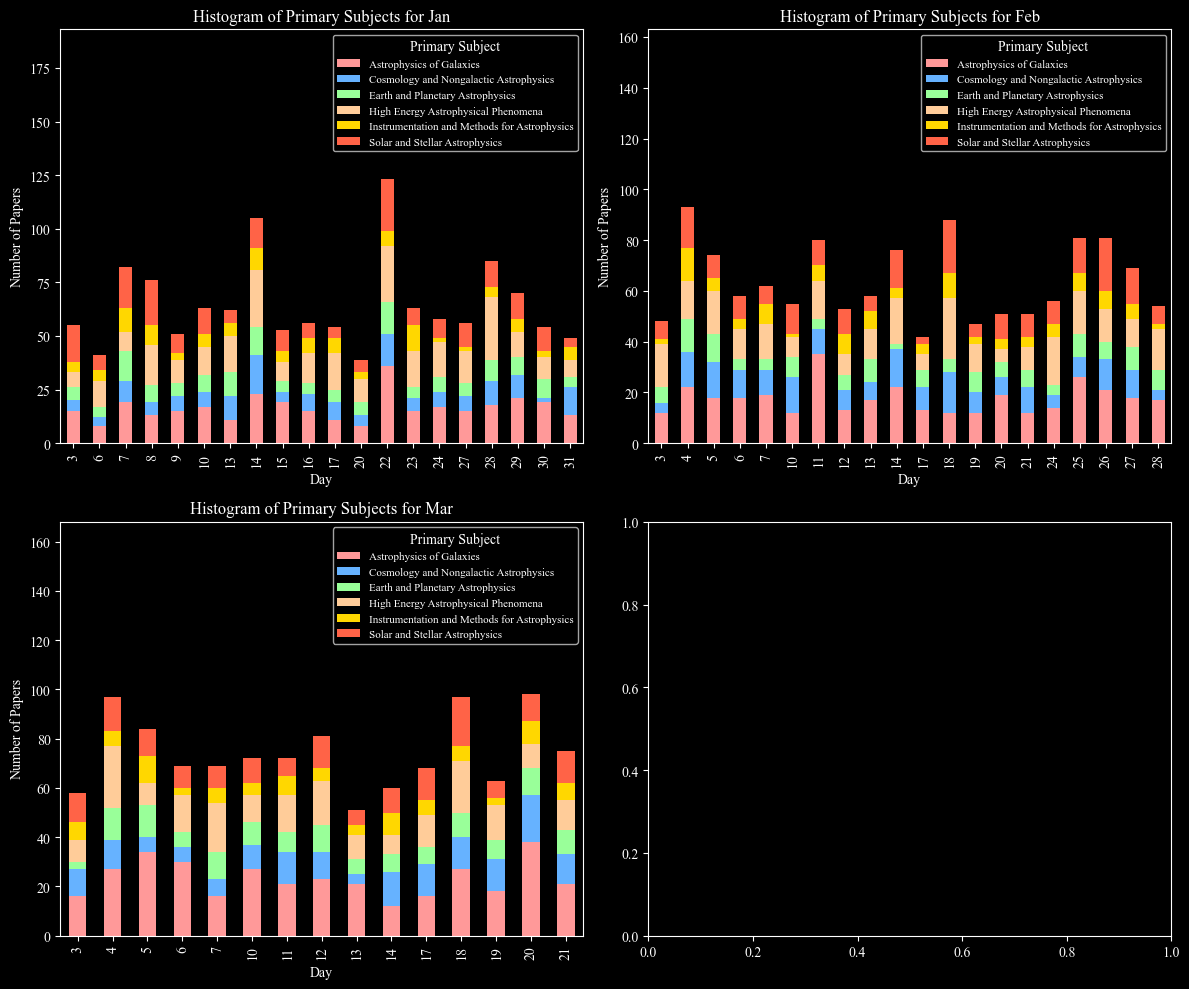

In [20]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

num_unique_months = data['month'].nunique()
list_unique_months = data['month'].unique()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(num_unique_months):
    ax = axs[i // 2, i % 2]
    masked_data = data[data['month'] == list_unique_months[i]]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    subject_counts_per_day.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_ylim(0, max(subject_counts_per_day.sum(axis=1)) + 70)
    ax.set_title(f'Histogram of Primary Subjects for {list_unique_months[i]}')
    ax.legend(title='Primary Subject', fontsize = 8, loc = 'upper right')

plt.tight_layout()
plt.show()


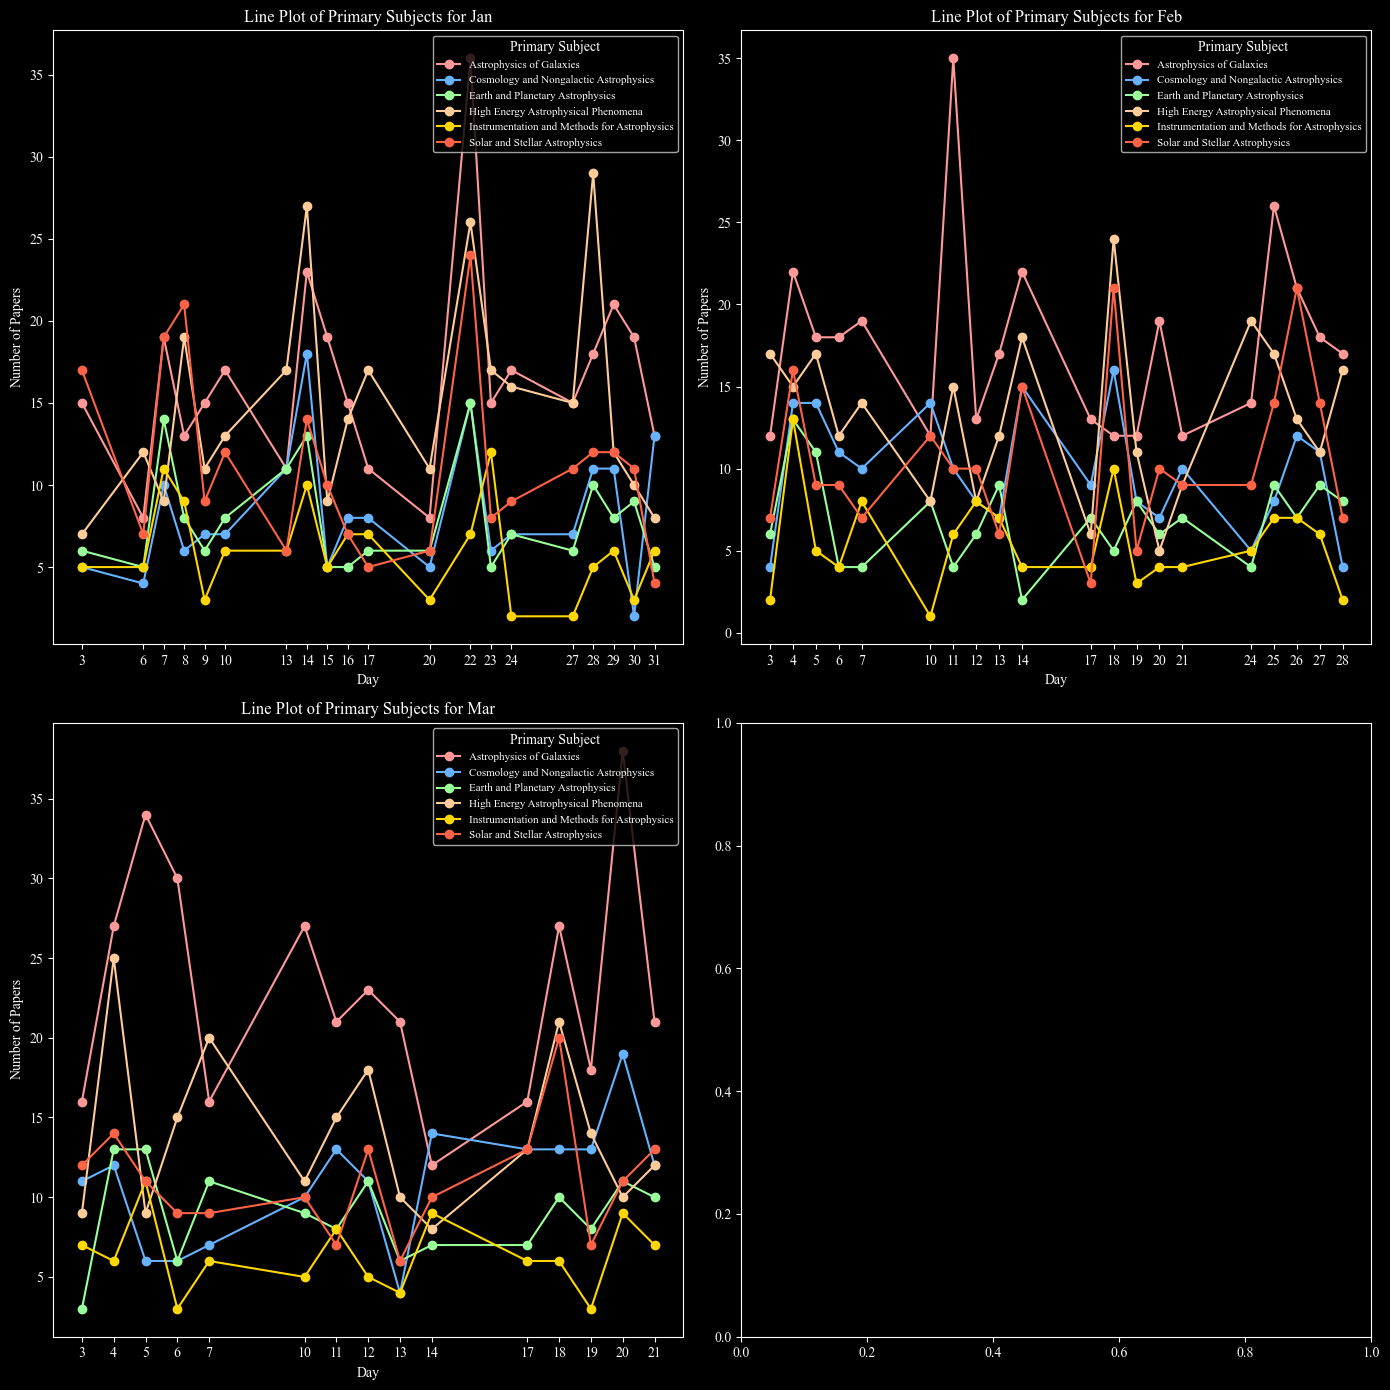

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for i, month in enumerate(list_unique_months):
    ax = axs[i // 2, i % 2]
    masked_data = data[data['month'] == month]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    for j, subject in enumerate(subject_counts_per_day.columns):
        ax.plot(subject_counts_per_day.index, subject_counts_per_day[subject], color=colors[j], label=subject, marker='o')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Line Plot of Primary Subjects for {month}')
    xticks_labels = [f"{day}" for day in subject_counts_per_day.index]
    ax.set_xticks(subject_counts_per_day.index)
    ax.set_xticklabels(xticks_labels, rotation=0)
    ax.legend(title='Primary Subject', fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()

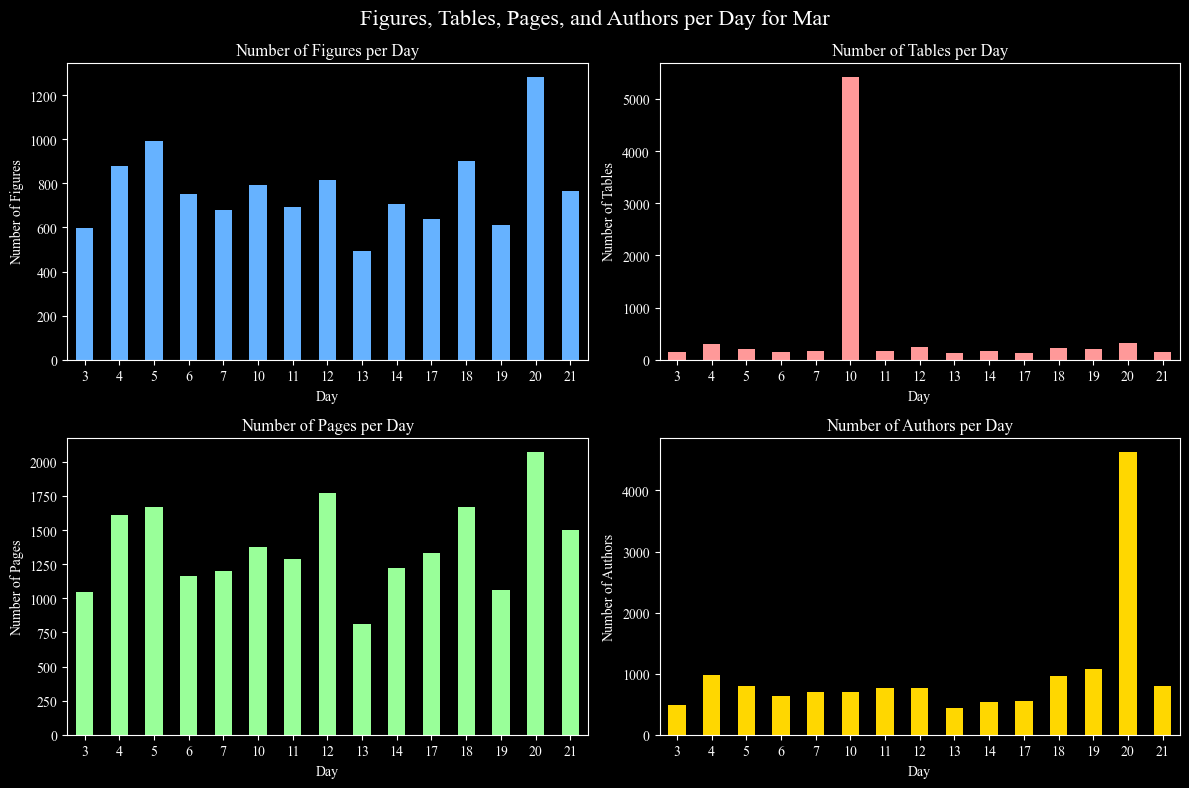

In [22]:

i = 2 # Month Number
masked_data = data[data['month'] == list_unique_months[i]]

figures_per_day = masked_data.groupby('day')['figures'].sum()
tables_per_day = masked_data.groupby('day')['tables'].sum()
pages_per_day = masked_data.groupby('day')['pages'].sum()
authors_per_day = masked_data.groupby('day')['authors'].apply(lambda x: x.str.split(', ').str.len().sum())

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_day.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Number of Figures')
ax[0, 0].set_title('Number of Figures per Day')
ax[0, 0].set_xticks(range(len(figures_per_day)))
ax[0, 0].set_xticklabels(figures_per_day.index, rotation=0)

tables_per_day.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Number of Tables')
ax[0, 1].set_title('Number of Tables per Day')
ax[0, 1].set_xticks(range(len(tables_per_day)))
ax[0, 1].set_xticklabels(tables_per_day.index, rotation=0)

pages_per_day.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Number of Pages')
ax[1, 0].set_title('Number of Pages per Day')
ax[1, 0].set_xticks(range(len(pages_per_day)))
ax[1, 0].set_xticklabels(pages_per_day.index, rotation=0)

authors_per_day.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Number of Authors')
ax[1, 1].set_title('Number of Authors per Day')
ax[1, 1].set_xticks(range(len(authors_per_day)))
ax[1, 1].set_xticklabels(authors_per_day.index, rotation=0)

plt.suptitle(f'Figures, Tables, Pages, and Authors per Day for {list_unique_months[i]}', fontsize=16)
plt.tight_layout()
plt.show()


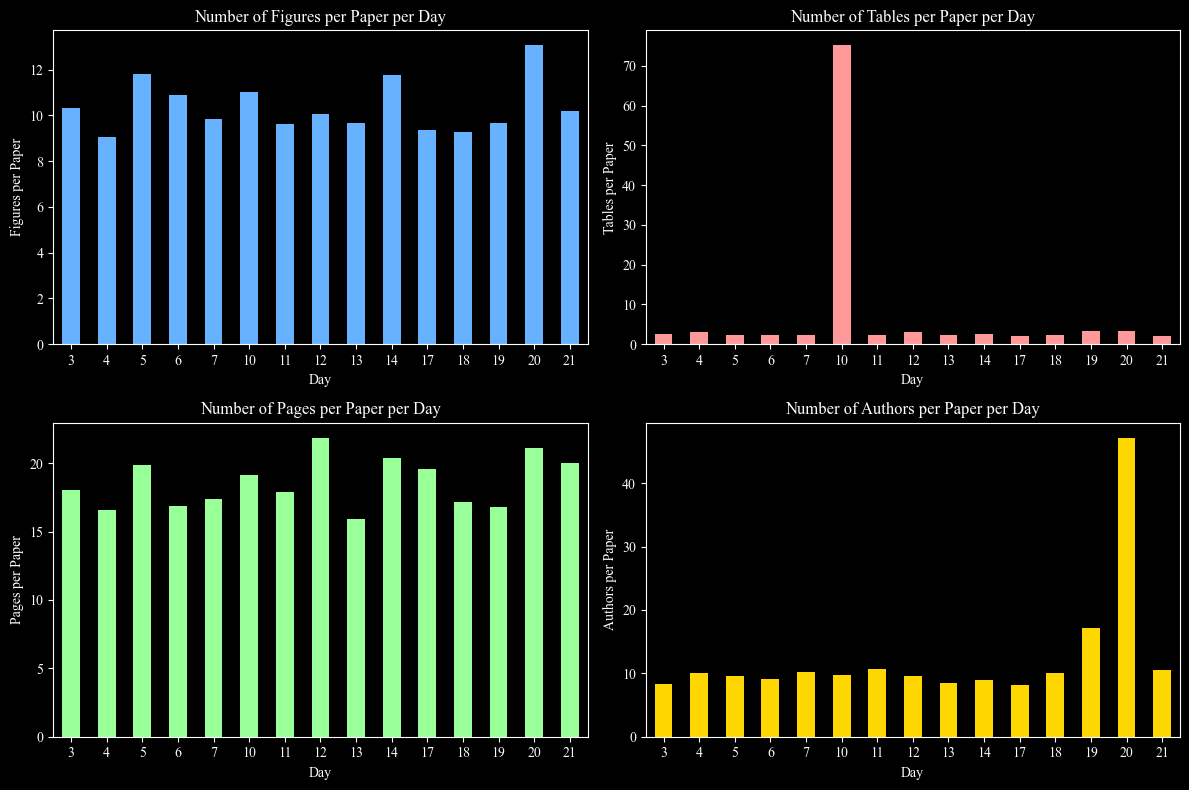

In [23]:
masked_data = data[data['month'] == list_unique_months[i]]

papers_per_day = masked_data.groupby('day').size()

figures_per_paper = figures_per_day / papers_per_day
tables_per_paper = tables_per_day / papers_per_day
pages_per_paper = pages_per_day / papers_per_day
authors_per_paper = authors_per_day / papers_per_day

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_paper.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Figures per Paper')
ax[0, 0].set_title('Number of Figures per Paper per Day')
ax[0, 0].set_xticks(range(len(figures_per_paper)))
ax[0, 0].set_xticklabels(figures_per_paper.index, rotation=0)

tables_per_paper.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Tables per Paper')
ax[0, 1].set_title('Number of Tables per Paper per Day')
ax[0, 1].set_xticks(range(len(tables_per_paper)))
ax[0, 1].set_xticklabels(tables_per_paper.index, rotation=0)

pages_per_paper.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Pages per Paper')
ax[1, 0].set_title('Number of Pages per Paper per Day')
ax[1, 0].set_xticks(range(len(pages_per_paper)))
ax[1, 0].set_xticklabels(pages_per_paper.index, rotation=0)

authors_per_paper.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Authors per Paper')
ax[1, 1].set_title('Number of Authors per Paper per Day')
ax[1, 1].set_xticks(range(len(authors_per_paper)))
ax[1, 1].set_xticklabels(authors_per_paper.index, rotation=0)

plt.tight_layout()
plt.show()


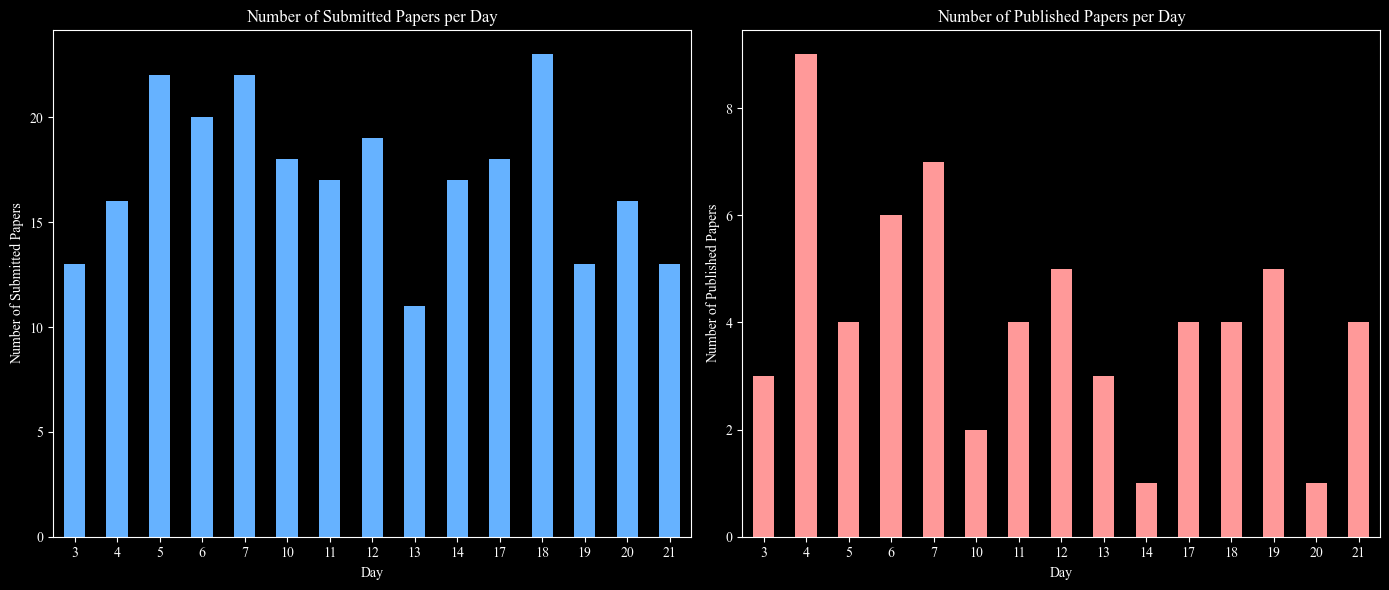

In [24]:
masked_data = data[data['month'] == list_unique_months[i]]
submitted_papers_per_day = masked_data.groupby('day')['submitted_journal'].count()
published_papers_per_day = masked_data.groupby('day')['published_journal'].count()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

submitted_papers_per_day.plot(kind='bar', ax=ax[0], color='#66B2FF')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Submitted Papers')
ax[0].set_title('Number of Submitted Papers per Day')
ax[0].set_xticks(range(len(submitted_papers_per_day)))
ax[0].set_xticklabels(submitted_papers_per_day.index, rotation=0)

published_papers_per_day.plot(kind='bar', ax=ax[1], color='#FF9999')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Published Papers')
ax[1].set_title('Number of Published Papers per Day')
ax[1].set_xticks(range(len(published_papers_per_day)))
ax[1].set_xticklabels(published_papers_per_day.index, rotation=0)

plt.tight_layout()
plt.show()

In [25]:
keywords = data['keywords'].tolist()

# Flatten the list of keywords and count occurrences
all_keywords = [keyword for sublist in keywords for keyword in sublist.split(', ')]
keyword_counts = Counter(all_keywords)

# Find the most common keyword
most_common_keyword, count = keyword_counts.most_common(1)[0]
print(f"The most repeated keyword is {most_common_keyword} and it was repeated {count} times.")

# Second most common keyword
second_most_common_keyword, count = keyword_counts.most_common(2)[1]
print(f"The second most repeated keyword is {second_most_common_keyword} and it was repeated {count} times.")


The most repeated keyword is [] and it was repeated 1045 times.
The second most repeated keyword is 'accretion'] and it was repeated 18 times.


In [26]:
# Find the author papers
author = 'J. Carretero'
papers = data[data['authors'].str.contains(author)]
papers


,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,day,month
70,Photometry of outer Solar System objects from ...,For the 696 trans-Neptunian objects (TNOs) wit...,"['Pedro H. Bernardinelli', 'Gary M. Bernstein'...",13.0,52.0,4.0,arxiv.org/pdf/2501.01551,Earth and Planetary Astrophysics,['Instrumentation and Methods for Astrophysics...,NaN,NaN,[],2025-01-06,6,Jan
337,Euclid: Detecting Solar System objects in Eucl...,The ESA Euclid mission will survey more than 1...,"['A. A. Nucita', 'L. Conversi', 'A. Verdier', ...",11.0,15.0,2.0,arxiv.org/pdf/2501.05023,Instrumentation and Methods for Astrophysics,NaN,NaN,NaN,"['minor planets', 'asteroids: general – Planet...",2025-01-10,10,Jan
390,Dark Energy Survey Year 6 Results: Cell-based ...,We present the Metadetection weak lensing gala...,"['M. Yamamoto', 'M. R. Becker', 'E. Sheldon', ...",22.0,30.0,7.0,arxiv.org/pdf/2501.05665,Cosmology and Nongalactic Astrophysics,['Instrumentation and Methods for Astrophysics'],NaN,NaN,['gravitational lensing: weak – cosmology: obs...,2025-01-13,13,Jan
392,Dark Energy Survey Year 6 Results: Synthetic-s...,"Synthetic source injection (SSI), the insertio...","['D. Anbajagane', 'M. Tabbutt', 'J. Beas-Gonza...",18.0,29.0,2.0,arxiv.org/pdf/2501.05683,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,NaN,['sky surveys - astronomical simulations - cos...,2025-01-13,13,Jan
397,Dark Energy Survey Year 3 Results: Photometric...,We describe the photometric data set assembled...,"['K. Bechtol', 'I. Sevilla-Noarbe', 'A. Drlica...",21.0,27.0,7.0,arxiv.org/pdf/2501.05739,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['Surveys – Observational cosmology – Dark ene...,2025-01-13,13,Jan
399,Dark Energy Survey Year 6 Results: Point-Sprea...,We present the point-spread function (PSF) mod...,"['T. Schutt', 'M. Jarvis', 'A. Roodman', 'A. A...",24.0,33.0,1.0,arxiv.org/pdf/2501.05781,Cosmology and Nongalactic Astrophysics,['Instrumentation and Methods for Astrophysics'],NaN,NaN,[],2025-01-13,13,Jan
463,Comparing the DES-SN5YR and Pantheon+ SN cosmo...,Recent cosmological analyses measuring distanc...,"['M. Vincenzi', 'R. Kessler', 'P. Shah', 'J. L...",5.0,9.0,8.0,arxiv.org/pdf/2501.06664,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,"['cosmology', 'supernovae', 'dark energy 1 CON...",2025-01-14,14,Jan
532,Euclid: Optimising tomographic redshift binnin...,We present a simulation-based method to explor...,"['J. H. W. Wong', 'M. L. Brown', 'C. A. J. Dun...",17.0,28.0,1.0,arxiv.org/pdf/2501.07559,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['Cosmology: observations – dark energy – cosm...,2025-01-14,14,Jan
589,Euclid preparation LX. The use of HST images a...,Data from the Euclid space telescope will enab...,"['Euclid Collaboration', 'D. Scognamiglio', 'T...",20.0,23.0,2.0,arxiv.org/pdf/2501.08372,Cosmology and Nongalactic Astrophysics,NaN,A&A,NaN,['gravitational lensing: weak - techniques - c...,2025-01-16,16,Jan
742,High-Significance Detection of Correlation Bet...,Our understanding of the $\gamma$-ray sky has ...,"['B. Thakore', 'M. Negro', 'M. Regis', 'S. Cam...",15.0,34.0,5.0,arxiv.org/pdf/2501.10506,Cosmology and Nongalactic Astrophysics,['High Energy Astrophysical Phenomena'],NaN,NaN,[],2025-01-22,22,Jan
